## Part 1: Data Exploration: Graduate School Admissions
The data we will be using is admission data on Grad school acceptances.

admit: whether or not the applicant was admitted to graduate school
gpa: undergraduate GPA
gre: score of GRE test
rank: prestige of undergraduate school (1 is highest prestige, ala Harvard)
We will use the GPA, GRE, and rank of the applicants to try to predict whether or not they will be accepted into graduate school.

## Imports

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### # 1. Load in the dataset into pandas: data/grad.csv

In [147]:
df = pd.read_csv('grad.csv')
df.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### # 2. Use the pandas describe method to get some preliminary summary statistics on the data. 

In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


### # 3. Use the pandas crosstab method to see how many applicants from each rank of school were accepted

0.5409836065573771
0.3576158940397351
0.23140495867768596
0.1791044776119403


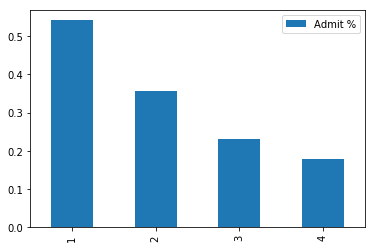

In [149]:
admitpct = np.array([])
ct = pd.crosstab(df['admit'], df['rank'])
for x in range(4):
    print((ct.iloc[1,x]) / (ct.iloc[0,x] + ct.iloc[1,x]))
    admitpct = np.append( admitpct, (ct.iloc[1,x]) / (ct.iloc[0,x] + ct.iloc[1,x]) )
admitpct = pd.DataFrame(admitpct)
admitpct.index = admitpct.index + 1
admitpct.columns = ['Admit %']
admitpct.plot(kind = 'bar')

### # 4. What does the distribution of the GPA and GRE scores look like? Do the distributions differ much? Hint: Use the pandas hist method.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002601F2AF588>]],
      dtype=object)

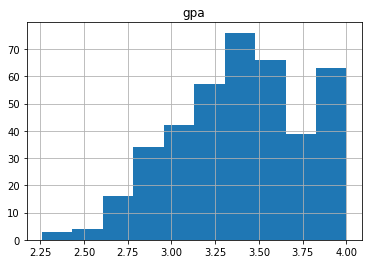

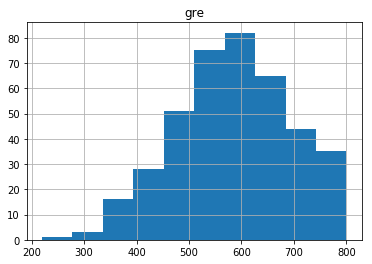

In [69]:
df.hist(column="gpa");df.hist(column="gre"); df.hist(column="rank")

#### # 5. Make a scatterplot of each predictor variable vs. the target (admitted). This can be tricky, because the target in a 
#### classification model can only take on two possible values. You may wish to add some random noise to the y-coordinates 
#### (also called "jitter") to make the data density easier to see.

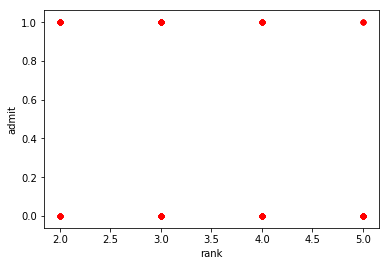

In [79]:
# This needs more work, definitely not done
df.plot(kind='scatter', x='rank', y='admit', color='red') 

## Part 2: Predicting Graduate School Admissions

### 1. Use sklearn to fit a Logistic Regression to the raw data. Your target variable should be admittance to graduate school.

In [80]:
y = df.admit.values
X = df[['gre','gpa','rank']].values
X.shape, y.shape

((400, 3), (400,))

In [156]:
scalar = StandardScaler().fit(X)
X = scalar.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
model.intercept_, model.coef_

(array([-0.94007471]), array([[ 0.19173263,  0.36139703, -0.49518519]]))

In [157]:
y_hat = model.predict(X_test)
y_test, y_hat

(array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64))

In [214]:
np.sum(y_test == y_hat)/y_hat.size

0.675

#### # 2. Once we feel comfortable with our model, we can move on to cross validation. Use sklearn's KFold cross validation and 
#### LogisticRegression to calculate the average log-loss across a 10 fold cross validation. Try to gridsearch across various 
#### hyperparameters to increase the predictive power of your model.

In [159]:
p_hat = model.predict_proba(X_test)[:,1]
log_loss(y_test, p_hat)

0.6012217153248273

In [ ]:
# 3. Take some time to try to improve the models predictive power. Make sure you use cross validation to evaluate whether adding 
# in any predictors improves the model, as you cannot trust the training log-loss! Here are some ideas:

# Do some creative feature engineering. Do you think any comparisons between the predictors could be predictive (i.e. a student 
# with a good gpa but a poor gpa score, or the reverse)?
# Add some quadratic terms or other feature transformations / interactions.



In [16]:
# 4. The rank column is ordinal where we assume an equal change between ranking levels, but we could also consider it to be 
# more generally categorical. Use panda's get_dummies to binarize the column.


In [17]:
# 5. Compute the log-loss after categorizing the rank column. Does it do better or worse with the rank column binarized?
# From now on, use the version of the feature matrix that performed the best.



In [18]:
# 6. Say we are using this as a first step in the application process. We want to weed out clearly unqualified candidates, 
# but not reject too many candidates. How may we use the predicted probabilities from our model to accomplish this?


In [163]:
# 7. Plot your final ROC curve, what should the cutoff be? What is the AUC score?

pred_neg = (y_test == y_hat)[p_hat < 0.5]
pred_pos = (y_test == y_hat)[p_hat > 0.5]
TN, FN = pred_neg.sum(), (~pred_neg).sum()
TP, FP = pred_pos.sum(), (~pred_pos).sum()
TN, FN, TP, FP

(71, 33, 10, 6)

In [164]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[71,  6],
       [33, 10]], dtype=int64)

In [206]:
accuracy = (TN + TP) / (TN + TP + FN + FP)
auc = roc_auc_score(y_test, p_hat)
accuracyscore = accuracy_score(y_test, y_hat)
precision_score(y_test, y_hat)
recall_score(y_test, y_hat)
print("Accuracy = ", accuracy)
print("AUC = ", auc)
print("Accuracy Score = ", accuracyscore)
print("Precision Score = ", precision_score(y_test, y_hat))
print("Recall Score = ", recall_score(y_test, y_hat))

Accuracy =  0.675
AUC =  0.7106614315916641
Accuracy Score =  0.675
Precision Score =  0.625
Recall Score =  0.23255813953488372


In [182]:
cmdf = pd.DataFrame(cm, index=['Predict Rejection','Predict Admission'], columns=['Actual Rejection', 'Actual Admission'])
cmdf

,Actual Rejection,Actual Admission
Predict Rejection,71,6
Predict Admission,33,10


In [183]:
# at what weight is the probability 0.5
# midpoint = -B0 + ln(p/1-p) / B1
midpoint = ((- model.intercept_[0]) + 0 ) / model.coef_[0][0] 
midpoint

4.903050155343316

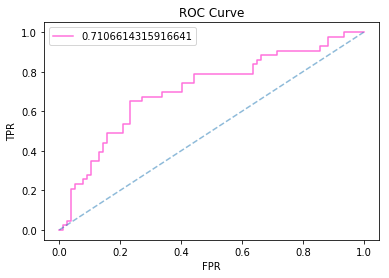

In [184]:
fpr, tpr, thr = roc_curve(y_test, p_hat)
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [188]:
searchCV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=10
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='lbfgs'
        ,tol=10
    )
modelcv = searchCV.fit(X_train, y_train)

In [190]:
y_hatcv = modelcv.predict(X_test)
np.sum(y_test == y_hatcv) , np.sum(~(y_test == y_hatcv))

(77, 43)

In [191]:
77/120

0.6416666666666667

In [192]:
df[['is_rank1', 'is_rank2', 'is_rank3', 'is_rank4']] = pd.get_dummies(df['rank']).iloc[:, ]
df.head(3)

,admit,gre,gpa,rank,is_rank1,is_rank2,is_rank3,is_rank4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0


In [194]:
newy = df.admit
newX = df[['gre', 'gpa', 'is_rank1', 'is_rank2', 'is_rank3', 'is_rank4']]
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, newy, test_size=0.30, random_state=40)
scalar = StandardScaler().fit(newX_train)
nX_train = scalar.transform(newX_train)
nX_test = scalar.transform(newX_test)
newmodel = LogisticRegression(solver='lbfgs').fit(nX_train, newy_train)
newmodel.intercept_, newmodel.coef_

(array([-0.95928775]),
 array([[ 0.19809277,  0.35368279,  0.24500086,  0.17445065, -0.04572062,
         -0.4056767 ]]))

In [195]:
yhat = newmodel.predict(nX_test)
accuracy_score(newy_test, yhat)

0.65